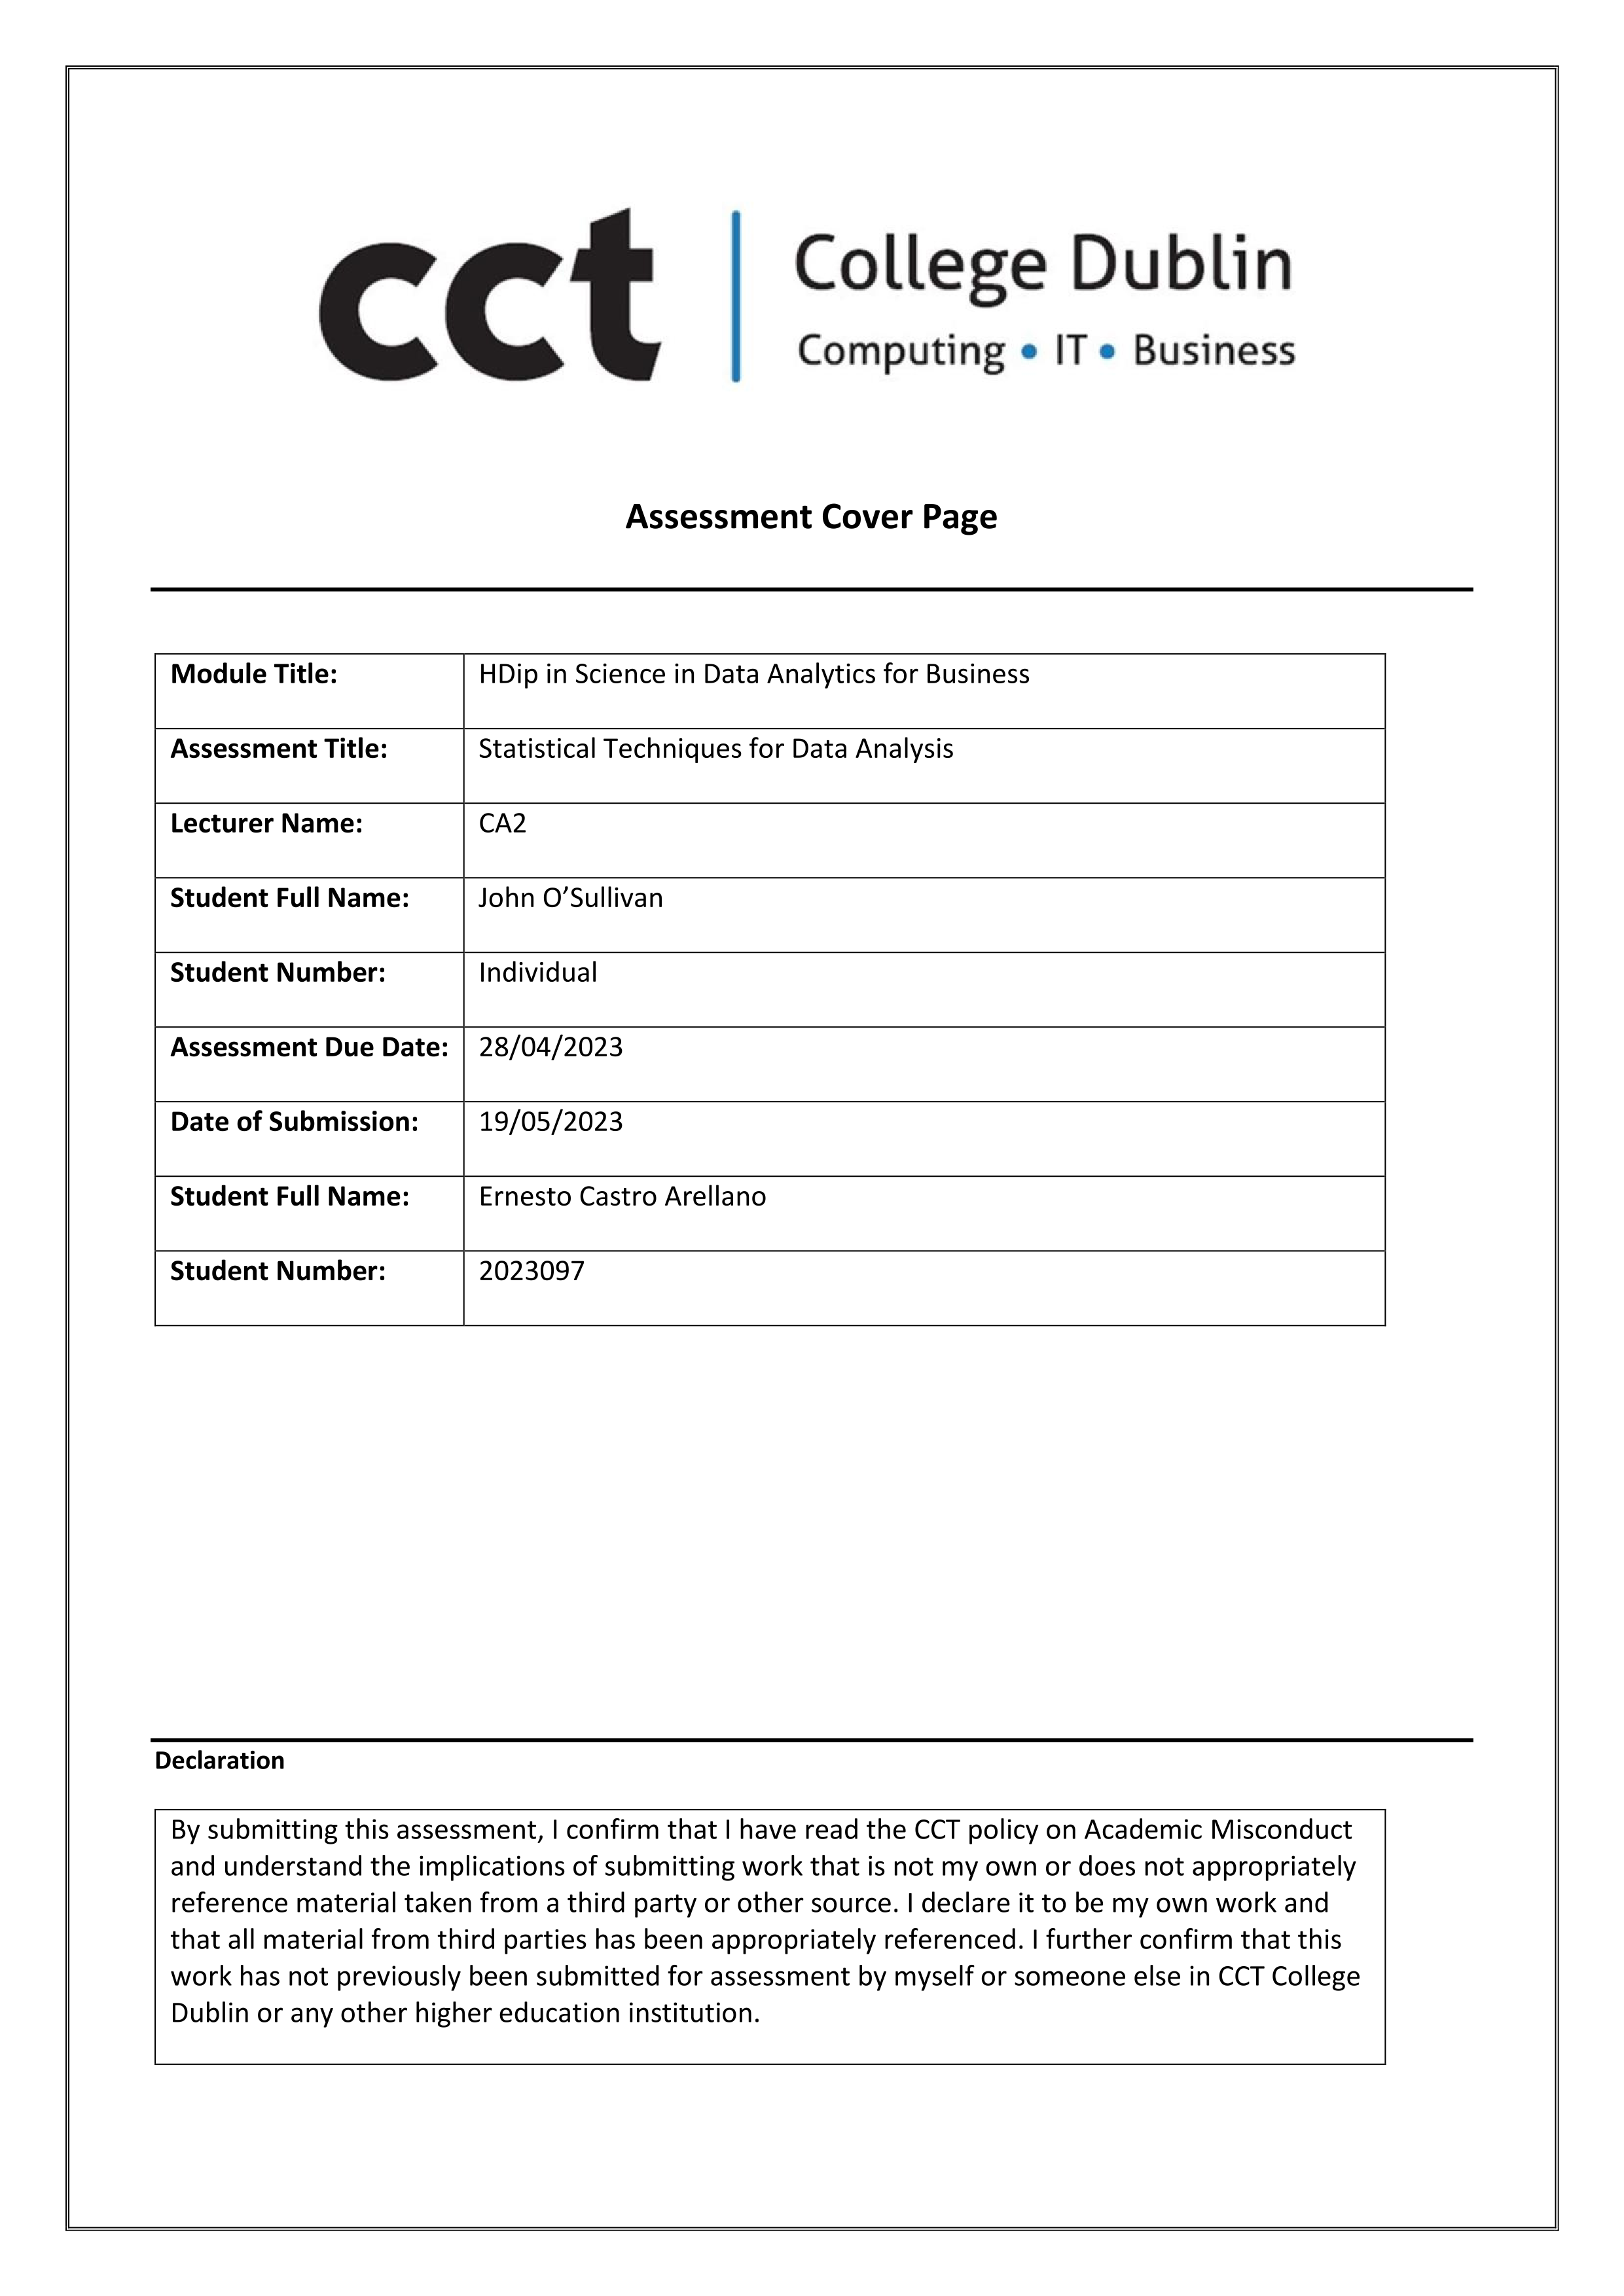

In [3]:
from IPython.display import Image
Image("CA Cover Sheet for submissions.png")

In [55]:
import pandas as pd
import seaborn as sns
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import f_oneway
from pydataset import data


# Task 1

1. Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students from a Dublin secondary school.

- a. Find and comment on important summary statistics and produce an appropriate plot to
summarise the dataset.
- b. One of the teachers is concerned about the performance of the students in the school. She
suspects that their performance may be below the reported national average of 70%. Does
the data show that her concerns are justified? Use a significance level of alpha = 0.05.
- c. Produce and comment on an appropriate plot to illustrate your findings.

In [5]:
df = pd.read_csv("Q1.csv")

In [6]:
df.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [7]:
df.shape

(50, 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exam_score  50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


**a. Find and comment on important summary statistics and produce an appropriate plot to summarise the dataset.**

Using this function, we can obtain the descriptive statistics for our dataset. A list of all the dataset's column statistics is the result of this function. Finding outliers or missing data is made easier by having a thorough understanding of the data being worked on. The next summary shows us the number of non-null values, the mean, the standard deviation, the minimum and maximum values, and the percentiles 25%, 50%, and 75% for this dataset. For this dataset, we will just analyse the numerical variables.

- 1. The table informs us that there are 50 rows in all.
- 2. It gives us the mean, the greatest number, which enables us to compare our data to other data sets and understand it overall. Outliers aren't displayed in our data collection, though, as far as we can tell.
- 3. It provides us with the standard deviation, a statistic that illustrates the variability or spread of a data set.
- 4. It delivers us the minimal value.
- 5. The values of the percentiles 25th, 50th, and 75th, which are statistical approaches that divide an ordered piece of data into 100 equal parts, are visible. We observed that these values, which indicate the dataset's values, are 25%, 50%, and 75%.
- 6. In addition, we have the maximum, which is the highest value in our collection.
- 7. As we can observe the following boxplot graph we dont have outliers.

In [9]:
df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


With the next code we will see the distribution of our data with the maximum and minimun values and the percentiles

Text(0.5, 1.0, 'Bookings')

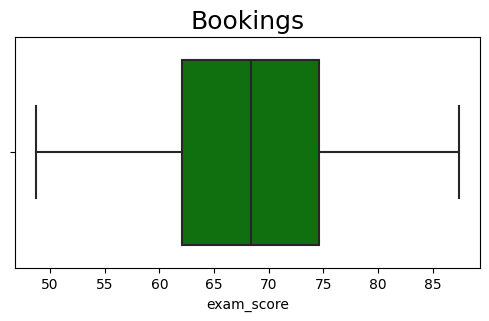

In [10]:
fig = plt.figure(figsize=(6, 3))

sns.boxplot(x ='exam_score',
             data=df, orient='h', color='green') 
plt.title('Bookings',
           fontsize=18)


The distribution of exam scores is shown next, along with the frequency, which indicates the number of students who received results that were comparable within the classroom. Finally, we can see the mean score, which is represented by a red line, within our distribution.

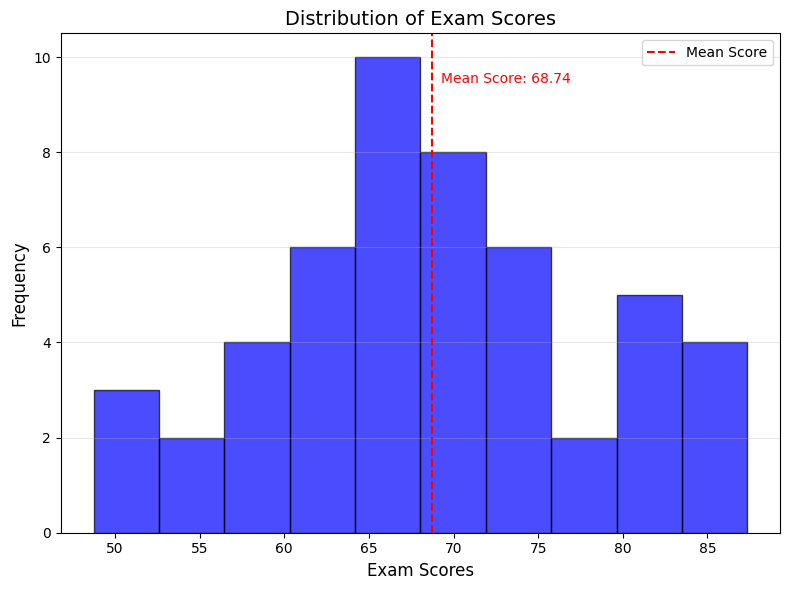

In [11]:
# Create a histogram
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.hist(df['exam_score'], bins=10, edgecolor='black', color='blue', alpha=0.7)  # Adjust color and transparency (alpha) if desired

# Set labels and title
plt.xlabel('Exam Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Exam Scores', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', alpha=0.3)

# Add a vertical line for the mean
mean_score = df['exam_score'].mean()
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1.5, label='Mean Score')
plt.legend()

# Add text annotation for the mean score
plt.text(mean_score + 0.5, plt.ylim()[1] * 0.9, f'Mean Score: {mean_score:.2f}', color='red')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

**b. One of the teachers is concerned about the performance of the students in the school. She suspects that their performance may be below the reported national average of 70%. Does the data show that her concerns are justified? Use a significance level of alpha = 0.05.**

1. State the null ($H_0$) and alternative ($H_A$) hypotheses.

$H_0: \mu = 70$ vs. $H_A: \mu \neq 70$

We can do a hypothesis test to see whether the teacher's concern about the students' performance is warranted. Given that the teacher suspects that the students' performance may be below the 70% national average, we can formulate our hypotheses in the following way:

**Null Hypothesis(H0)**: The average exam score at the school is equal to or higher than 70%.

**Alternative Hypothesis (HA)**: The average exam score at the school is less than 70%. 

In [13]:
from scipy import stats

# Set significance level (alpha)
alpha = 0.05
national_average = 70

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['exam_score'], national_average)

# Check if concerns are justified
if p_value < alpha:
    print("The concerns are justified. The performance is significantly below the national average.")
else:
    print("The concerns are not justified. The performance is not significantly below the national average.")


The concerns are not justified. The performance is not significantly below the national average.


In [14]:
stats.ttest_1samp(df['exam_score'], popmean=70, alternative = "less")

Ttest_1sampResult(statistic=-0.9169771399834613, pvalue=0.18182298516031403)

If the p-value $<$ $\alpha$, we reject $H_0$. If the p-value $\nless$ $\alpha$, we fail to reject $H_0$. 

If the p-value is smaller than the significance level (alpha) 0.05, we reject the null hypothesis and conclude that the performance is significantly below the national average.

Since the the p-value $\nless$ $\alpha$, we fail to reject $H_0$. 

**c. Produce and comment on an appropriate plot to illustrate your findings**

With the help of this code, a bar graph comparing the average exam score to the national reference standard will be produced. The dotted red line represents the benchmark national average of 70%.

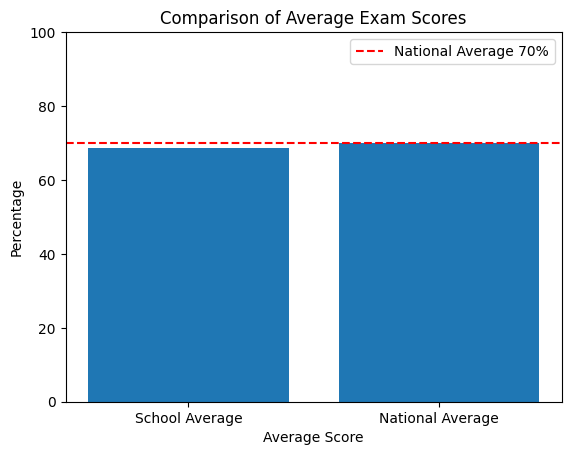

In [53]:
mean_score = df['exam_score'].mean()

data = np.array([mean_score, national_average])

labels = ['School Average', 'National Average']

plt.bar(labels, data)
plt.ylim(0, 100)
plt.axhline(y=national_average, color='r', linestyle='--', label='National Average 70%')
plt.xlabel('Average Score')
plt.ylabel('Percentage')
plt.title('Comparison of Average Exam Scores')
plt.legend()
plt.show()

We can conclude by saying that if the national average is below the average for the exams and the difference is statistically significant, this would support the teacher's concerns. On the other hand, if the average of the exam scores is higher than the national average or there isn't a statistically significant difference, it may be concluded that the teacher's concern is unfounded. Therefore as we can observe the average exam score is not above the national average then we conclude that the concern of the teacher is unfounded.

# Task 2

2. Load the diamonds dataset, and print the first 5 rows. The color variable refers to the colour of the diamond, with categories from “D” to “J”. Colourless diamonds are considered better than diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).

 - a. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.
 - b. Perform an appropriate hypothesis test to determine whether there is any association between the clarity of a diamond and whether it is colourless or not. Use a significance level of alpha = 0.01.
 - c. Produce and comment on an appropriate plot to illustrate your findings.
 - d. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds and the mean price of non-colourless diamonds.

In [21]:
df2 = pd.read_csv("diamonds.csv")

In [22]:
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
df2.shape

(53940, 10)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


We may get our dataset's descriptive statistics by using this function. This function returns a list of all the dataset's column statistics. Having a solid understanding of the data being worked on makes finding outliers or missing data easier. The following summary displays the dataset's mean, standard deviation, lowest and maximum values, percentiles of 25%, 50%, and 75%, as well as the number of non-null values. We will only analyse the numerical variables for this dataset.

1. The table tells us there are 53940 total rows.
2. It provides us with the mean, the biggest number, allowing us to compare our data to other data sets and gain a general understanding of it. But as far as we can tell, outliers are not shown in our data collection.
3. It gives us the standard deviation, a statistic that shows how a data collection is variable or spread out.
4. We receive the bare minimum from it.
5. There exist numbers for the 25th, 50th, and 75th percentiles, which are statistical methods for dividing an ordered set of data into 100 equal parts. These values, which represent the dataset's values, are seen to be 25%, 50%, and 75%.
6. In addition, we have the highest value in our collection, the maximum.

In [27]:
df2.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [28]:
df2['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

**a. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.**

This code checks if the color of each diamond is in the range of "D" to "F" and assigns 1 to the "colourless" column if true, and 0 otherwise.

In [29]:
# Create the "colourless" variable
df2["colourless"] = (df2["color"].isin(["D", "E", "F"])).astype(int)

In [30]:
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,colourless
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


**b. Perform an appropriate hypothesis test to determine whether there is any association between the *clarity* of a diamond and whether it is *colourless* or not. Use a significance level of alpha = 0.01.**

1. State the null ($H_0$) and alternative ($H_A$) hypotheses.

$H_0: \mu = No Association$   vs. $H_A: \mu \neq Association$

**Null Hypothesis (H0)**: There is no association between the clarity and colorlessness of a diamond. This means that the variables are independent of each other.

**Alternative Hypothesis (HA)**: There is an association between the clarity and colorlessness of a diamond. This means that the variables are dependent or related to each other.

To perform this test, you can use the chi-square test of independence. It tests whether there is a relationship between two categorical variables. The chi2_contingency function calculates the chi-square statistic, p-value, and other values needed for the test. The p-value is then compared to the significance level (alpha) 0.01 to determine if there is evidence of an association.

In [38]:
V_ass = pd.pivot_table(df2, index=['clarity'],columns=['colourless'],aggfunc='size')
V_ass

colourless,0,1
clarity,,
I1,454,287
IF,1174,616
SI1,6425,6640
SI2,4502,4692
VS1,4821,3350
VS2,5890,6368
VVS1,2013,1642
VVS2,2547,2519


In [44]:
from scipy.stats import chi2

# Create a contingency table
contingency_table = pd.crosstab(df2["clarity"], df2["colourless"])

# Calculate the chi-square statistic, p-value, and degrees of freedom
chi2_stat, p_value, dof, _ = chi2_contingency(contingency_table)

# Check the p-value against the significance level
alpha = 0.01
if p_value < alpha:
    print("There is evidence of an association between clarity and colorlessness.")
else:
    print("There is no evidence of an association between clarity and colorlessness.")

# Print the chi-square statistic to the output
print("Chi-square statistic:", chi2_stat)

# Print the p-value to the output
print("p-value:", p_value)

# Print the Degrees of freedom to the output
print("Degrees of Freedom:",dof)

There is evidence of an association between clarity and colorlessness.
Chi-square statistic: 486.47305941485223
p-value: 6.481587124454714e-101
Degrees of Freedom: 7


If the p-value $<$ $\alpha$, we reject $H_0$. If the p-value $\nless$ $\alpha$, we fail to reject $H_0$. 

If the p-value is smaller than the chosen significance level (alpha), typically 0.01 or 0.05, we reject the null hypothesis in favor of the alternative hypothesis.

Since the the p-value $<$ $\alpha$, we reject $H_0$

**c. Produce and comment on an appropriate plot to illustrate your findings.**

In this step, we'll use the next function to create a bar graph that shows the distribution of the diamonds' clarity while distinguishing between incolorous and non-incolorous diamonds. The end result is a graph that shows how the distribution of clarity varies depending on whether or not the diamonds are coloured.

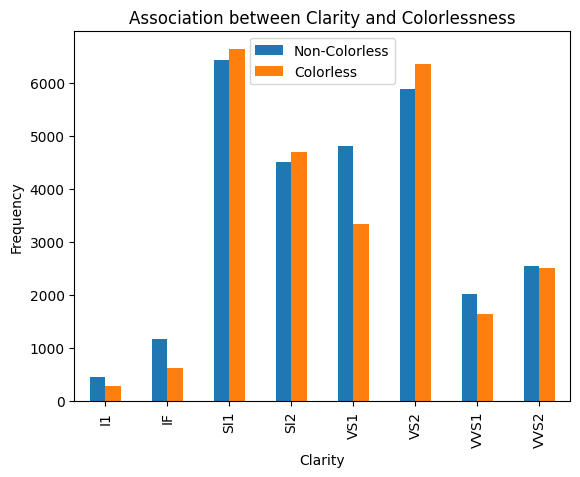

In [87]:
# Create a bar plot
contingency_table.plot(kind="bar")
plt.xlabel("Clarity")
plt.ylabel("Frequency")
plt.title("Association between Clarity and Colorlessness")
plt.legend(["Non-Colorless", "Colorless"])
plt.show()

**d. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds and the mean price of non-colourless diamonds.**

Confidence intervals provide a range of values within which the true population parameter is likely to fall.

We'll use the bootstrap methodology to find the confidence intervals, which entails removing the data with replacement and creating multiple bootstrap examples. Calculating the mean for each sample allows us to determine the distribution of those means, which allows us to estimate the confidence intervals.

In [90]:
from sklearn.utils import resample

# Define the bootstrap function
def bootstrap(data, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        resampled = resample(data)
        mean = np.mean(resampled)
        means.append(mean)
    return means

# Separate the prices of colorless and non-colorless diamonds
colorless_prices = df2[df2["colourless"] == 1]["price"]
non_colorless_prices = df2[df2["colourless"] == 0]["price"]

# Calculate the bootstrap means and confidence intervals
colorless_means = bootstrap(colorless_prices)
non_colorless_means = bootstrap(non_colorless_prices)

# Calculate the confidence intervals
colorless_ci = np.percentile(colorless_means, [5, 95])
non_colorless_ci = np.percentile(non_colorless_means, [5, 95])

# Print the confidence intervals
print("90% Confidence Interval for Mean Price of Colorless Diamonds:")
print(colorless_ci)
print("90% Confidence Interval for Mean Price of Non-Colorless Diamonds:")
print(non_colorless_ci)

90% Confidence Interval for Mean Price of Colorless Diamonds:
[3306.06115877 3376.33579498]
90% Confidence Interval for Mean Price of Non-Colorless Diamonds:
[4447.58447315 4534.08911629]


The 90% confidence interval for the mean price of **colorless** diamonds represents the range within which the true population mean price is estimated to fall with 90% confidence.

The 90% confidence interval for the mean price of **non-colorless** diamonds represents the range within which the true population mean price is estimated to fall with 90% confidence.


### Task 3

3. Load the PlantGrowth dataset from the pydataset library. It contains the results of a small study comparing the yields of plants obtained under a control and under two different treatment conditions.

 - a. Find and comment on important summary statistics by treatment and produce an appropriate plot to summarise the dataset.
 - b. Conduct an appropriate hypothesis test to see if there is evidence of a difference between the three means (that is, the control and the two treatments). Use a significance level of alpha = 0.05.
 - c. If there is evidence of a difference between the three means, find and comment on where this difference may be.

In [45]:
df3 = data('PlantGrowth')

In [46]:
df3.head()

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


In [48]:
df3.shape

(30, 2)

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


**a. Find and comment on important summary statistics by treatment and produce an appropriate plot to summarise the dataset.**

In [51]:
df3.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


These summarised statistics allow us to compare the central and dispersion measures between groups and provide an overall picture of how much weight is distributed throughout each group.

- **Group "ctrl":** This group has 10 observations. The average weight is 5.032 with a standard deviation of 0.583. The lowest recorded weight is 4.17; the first quarter (25%) is 4.550; the middle (50%) is 5.155; the fourth quarter (75%) is 5.2925; and the highest recorded weight is 6.11.

- **Group "trt1":** There are 10 observations. The average weight is 4.661 with a standard deviation of 0.793. The lowest recorded weight is 3.59, the first quarter (25%) is 4.2075, the middle (50%) is 4.550, the fourth quarter (75%) is 4.870, and the highest recorded weight is 6.03.

- **Group "trt2":** There are 10 observations. The average weight is 5.526, with a standard deviation of 0.442. The lowest recorded weight is 4.92; the first quarter (25%) is 5.2675; the middle (50%) is 5.435; the fourth quarter (75%) is 5.735; and the highest recorded weight is 6.31.

In [52]:
summary_stats = df3.groupby('group')['weight'].describe()
print(summary_stats)

       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


This code generates a boxplot with the x axis representing the groups and the y axis representing the weight. The boxplot  will enable us to see the variations in the weight distributions between the groups.

<AxesSubplot: xlabel='group', ylabel='weight'>

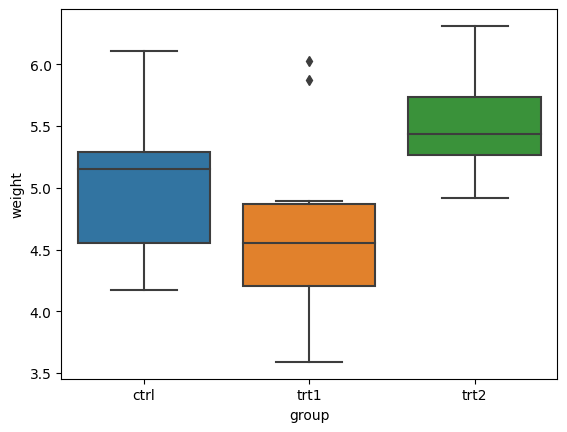

In [53]:
sns.boxplot(data=df3, x='group', y='weight')

**b. Conduct an appropriate hypothesis test to see if there is evidence of a difference between the three means (that is, the control and the two treatments). Use a significance level of alpha = 0.05.**

1. State the null ($H_0$) and alternative ($H_A$) hypotheses.

$H_0: \mu = ctrl, trt1, trt2$ vs. $H_A: \mu \neq ctrl, trt1, trt2$

During the hypothesis testing process, we evaluate the evidence to determine whether or not we reject the null hypothesis in favour of the alternate hypothesis.

**Null Hypothesis(H0):** There is no difference in the medians of the control and treatment groups

**Alternative Hypothesis (HA):** There is a difference between the medians of the control and treatment groups

We use one-factor analysis of variance (ANOVA) to conduct an appropriate hypothesis test and determine whether there is evidence of a difference between the three medians (control and two treatments).

In [69]:
control = df3[df3['group'] == 'ctrl']['weight']
trt1 = df3[df3['group'] == 'trt1']['weight']
trt2 = df3[df3['group'] == 'trt2']['weight']

# Make a decision based on the p-value
if p_value < alpha:
    print("There is a difference between the medians of the control and treatment groups.")
else:
    print("There is no difference in the medians of the control and treatment groups.")

# Perform the one-way ANOVA test:
f_statistic, p_value = f_oneway(control, trt1, trt2)
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

There is a difference between the medians of the control and treatment groups.
F-Statistic: 4.846087862380136
p-value: 0.015909958325622895


If the p-value $<$ $\alpha$, we reject $H_0$. If the p-value $\nless$ $\alpha$, we fail to reject $H_0$. 

If the p-value is smaller than the chosen significance level (alpha), typically 0.01 or 0.05, we reject the null hypothesis in favor of the alternative hypothesis.

Since the the p-value $<$ $\alpha$, we reject $H_0$

**c. If there is evidence of a difference between the three means, find and comment on where this difference may be.**

Three groups are listed in the table: "ctrl" (control group), "trt1" (treatment group 1), and "trt2" (treatment group 2). The average difference between each pair of groups' medians is shown along with the adjusted p value (p-adj), lower and upper confidence intervals, and the lower confidence interval for each pair of groups.

The "reject" column indicates whether or not the null hypothesis that there is no discernible difference in the medians of the groups is accepted. If "True" appears in the "reject" column, then the null hypothesis has been rejected and there is a significant difference between the medians of those two groups. If "False" is entered in the "reject" column, this means that neither the null hypothesis nor a meaningful difference exists between the medians of those two groups.

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey-Kramer Analysis:
tukey = pairwise_tukeyhsd(endog=df3['weight'],
                          groups=df3['group'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


In the provided table, we can see the following:

- The average difference between the control group ("ctrl") and treatment one ("trt1") is -0.371. However, the adjusted p value above the significance level (0.05), hence there is no significant difference between the medians of these two groups (reject = False).
- The average difference between the control group ("ctrl") and the second treatment ("trt2") is 0.494. There is no significant difference between the medians of these two groups because the adjusted p value is greater than the level of significance (reject = False).
- The average difference between Treatment 1 ("trt1") and Treatment 2 ("trt2") is 0.86. In this instance, the adjusted p value is less than the level of significance, indicating a significant difference between the medians of these two groups (reject = True).

We can draw the conclusion that, according to Tukey's multiple comparison test, there is only a statistically significant difference between the group averages for the comparison of treatments 1 and 2 ("trt1" and "trt2"). When the control group and treatment groups were compared, there were no appreciable differences in the medians.

### Task 4

4. Load the trees dataset from the pydataset library. It contains measurements of the diameter, height and volume of timber in 31 felled black cherry trees. Note that the diameter (in inches) is labelled girth in the dataset. It is measured at 4 foot 6 inches above the ground.

 - a. Perform a correlation analysis between all numerical variables. Include and comment on the results of hypothesis tests for the population correlation coefficients between all three pairs of variables (you can use the pearsonr function from the scipy.stats library).
 - b. There is interest in estimating the volume of timber from trees using either the girth or the height of the trees, or both. Perform a regression analysis to decide which of the three possible models you would recommend using. Interpret your results and provide a short conclusion of your findings.

In [70]:
df4 = data('trees')

In [71]:
df4.head()

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


In [74]:
df4.shape

(31, 3)

In [76]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Girth   31 non-null     float64
 1   Height  31 non-null     int64  
 2   Volume  31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 992.0 bytes


In [77]:
df4.describe()

,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


**a. Perform a correlation analysis between all numerical variables. Include and comment on the results of hypothesis tests for the population correlation coefficients between all three pairs of variables (you can use the pearsonr function from the scipy.stats library)**

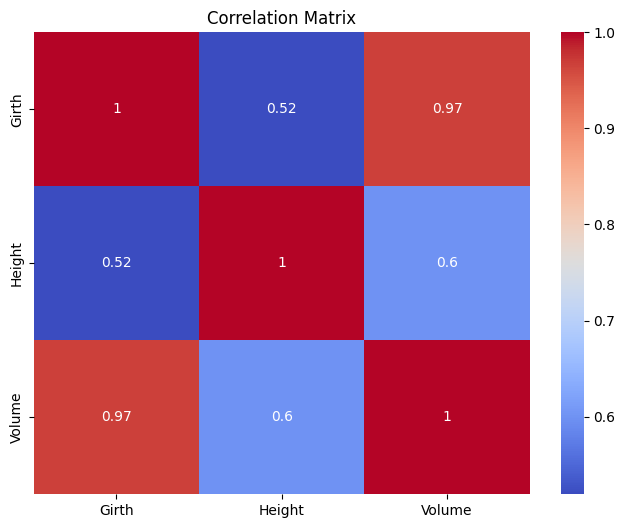

In [81]:
correlation_matrix = df4.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

- The relationship between "Girth" and "Height" is 0.52. This suggests a moderately positive correlation between these two factors. The diameter of trees tends to increase along with their height, though not by a strong margin.

- The relationship between "Girth" and "Volume" is 0.97. This correlation is strong and favourable. demonstrates a nearly linear relationship between the diameter of the trees and their wood production. The volume tends to increase in a proportional manner as the diameter increases.

- The relationship between "Height" and "Volume" is 0.6. This correlation is moderate and favourable. indicates that there is a relationship between the height of the trees and their wood volume, but it is not as strong as the relationship between the diameter and volume.


The results of the correlation matrix suggest that the Girth and Height of trees are related to their wood Volume. However, the correlation between the Girth and Volume is stronger than the correlation between the Height and Volume. This suggests that the Girth may be a more accurate predictor of the Volume of wood than Height.

**Hypothesis tests for the population correlation coefficients between all three pairs of variables**

1. State the null ($H_0$) and alternative ($H_A$) hypotheses.

$H_0: \mu = Girth,Height$ vs. $H_A: \mu \neq Girth,Height$

2. State the null ($H_0$) and alternative ($H_A$) hypotheses.

$H_0: \mu = Girth,Volume$ vs. $H_A: \mu \neq Girth,Volume$

3. State the null ($H_0$) and alternative ($H_A$) hypotheses.

$H_0: \mu = Height,Volume$ vs. $H_A: \mu \neq Height,Volume$

In [91]:
from scipy.stats import pearsonr

# Hypothesis test for correlation between girth and height
corr_gh, pvalue_gh = pearsonr(df4['Girth'], df4['Height'])
print("Correlation between Girth and Height:", corr_gh)
print("p-value:", pvalue_gh)
if pvalue_gh < 0.05:
    print("1_ The null hypothesis is rejected. There is a significant correlation between Girth and Height.")
else:
    print("1_ The null hypothesis is not rejected. There is not enough evidence to conclude a significant correlation between Girth and Height.")

# Hypothesis test for correlation between girth and volume
corr_gv, pvalue_gv = pearsonr(df4['Girth'], df4['Volume'])
print("Correlation between Girth and Volume:", corr_gv)
print("p-value:", pvalue_gv)
if pvalue_gv < 0.05:
    print("2_ The null hypothesis is rejected. There is a significant correlation between Girth and Volume.")
else:
    print("2_ The null hypothesis is not rejected. There is not enough evidence to conclude a significant correlation between Girth and Volume.")

# Hypothesis test for correlation between height and volume
corr_hv, pvalue_hv = pearsonr(df4['Height'], df4['Volume'])
print("Correlation between Height and Volume:", corr_hv)
print("p-value:", pvalue_hv)
if pvalue_hv < 0.05:
    print("3_ The null hypothesis is rejected. There is a significant correlation between Height and Volume.")
else:
    print("3_ The null hypothesis is not rejected. There is not enough evidence to conclude a significant correlation between Height and Volume.")

Correlation between Girth and Height: 0.5192800719499373
p-value: 0.002757814793057672
1_ The null hypothesis is rejected. There is a significant correlation between Girth and Height.
Correlation between Girth and Volume: 0.9671193682556305
p-value: 8.644334211770605e-19
2_ The null hypothesis is rejected. There is a significant correlation between Girth and Volume.
Correlation between Height and Volume: 0.5982496519917821
p-value: 0.00037838234791848745
3_ The null hypothesis is rejected. There is a significant correlation between Height and Volume.


If the p-value $<$ $\alpha$, we reject $H_0$. If the p-value $\nless$ $\alpha$, we fail to reject $H_0$. 

If the p-value is smaller than the chosen significance level (alpha), typically 0.01 or 0.05, we reject the null hypothesis in favor of the alternative hypothesis.

1. Since the the p-value $<$ $\alpha$, we reject $H_0$

2. Since the the p-value $<$ $\alpha$, we reject $H_0$

3. Since the the p-value $<$ $\alpha$, we reject $H_0$

**b. There is interest in estimating the volume of timber from trees using either the girth or the height of the trees, or both. Perform a regression analysis to decide which of the three possible models you would recommend using. Interpret your results and provide a short conclusion of your findings**

In [82]:
import statsmodels.api as sm

# Modelo 1: Volumen ~ Girth
model_girth = sm.OLS(df4['Volume'], sm.add_constant(df4['Girth'])).fit()
print(model_girth.summary())

# Modelo 2: Volumen ~ Height
model_height = sm.OLS(df4['Volume'], sm.add_constant(df4['Height'])).fit()
print(model_height.summary())

# Modelo 3: Volumen ~ Girth + Height
model_both = sm.OLS(df4['Volume'], sm.add_constant(df4[['Girth', 'Height']])).fit()
print(model_both.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     419.4
Date:                Mon, 22 May 2023   Prob (F-statistic):           8.64e-19
Time:                        16:23:58   Log-Likelihood:                -87.822
No. Observations:                  31   AIC:                             179.6
Df Residuals:                      29   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9435      3.365    -10.978      0.0

**1. Model: Volume - Girth**

R-squared: 0.935
Adjusted R-squared: 0.933
The coefficient for Girth is 5.0659.
The p-value for the Girth coefficient is 0.000 (less than 0.05).
Conclusion: There is a significant positive relationship between the Girth of trees and their Volume. This model explains 93.5% of the variance in Volume.

**2. Model: Volume - Height**

R-squared: 0.358
Adjusted R-squared: 0.336
The coefficient for Height is 1.5433.
The p-value for the Height coefficient is 0.000 (less than 0.05).
Conclusion: There is a significant positive relationship between the Height of trees and their Volume. This model explains 35.8% of the variance in Volume.

**3. Model: Volume ~ Girth + Height**


R-squared: 0.948
Adjusted R-squared: 0.944
The coefficients for Girth and Height are 4.7082 and 0.3393, respectively.
The p-values for both Girth and Height coefficients are 0.000 (less than 0.05).
Conclusion: There are significant positive relationships between both Girth and Height of trees with their Volume. This model explains 94.8% of the variance in Volume.


**Conclusion**

Taking findings into consideration, it is advised to use the **Model 3 (Volume ~ Girth + Height)**, which takes the Girth and Heigh factors into account. In comparison to the other two models, this one offers a better fit to the data, significant predictive variables, the ability to capture the influence of Girth and Height and the ability to provide understandable ideas regarding the relationship between these variables and tree volume.

**- Higher R-squared and Adjusted R-squared:** Model 3 has the highest R-squared value of 0.948, indicating that it explains 94.8% of the variance in Volume. The Adjusted R-squared value of 0.944 takes into account the number of predictors in the model and penalizes the inclusion of irrelevant variables. A higher R-squared and Adjusted R-squared indicate a better fit of the model to the data.

**- Significance of coefficients:** Both the Girth and Height coefficients in Model 3 have p-values of 0.000, which are less than the chosen significance level of 0.05. This indicates that both variables make a significant contribution to predicting the Volume of trees. In contrast, Model 1 (Volume ~ Girth) and Model 2 (Volume ~ Height) have only one significant predictor each.

**- Practical considerations:** Including both Girth and Height in the model provides a more comprehensive understanding of their influence on the Volume of trees. Girth represents the diameter of the trees, which is a common measurement used in the timber industry. Height represents the vertical extent of the trees, which also contributes to the overall volume of timber. By considering both variables, we can capture a broader range of factors that affect the Volume.

**- Interpretability:** Model 3 allows us to interpret the effects of both Girth and Height on the Volume of trees separately. The coefficient for Girth (4.7082) suggests that for every unit increase in Girth, the Volume of the tree increases by approximately 4.7 units, holding Height constant. Similarly, the coefficient for Height (0.3393) indicates that for every unit increase in Height, the Volume of the tree increases by approximately 0.34 units, holding Girth constant.

### References 

Zach (2020). What is the Family-wise Error Rate? [online] Statology. Available at: https://www.statology.org/family-wise-error-rate/.

Zach (2020). How to Perform Tukey’s Test in Python. [online] Statology. Available at: https://www.statology.org/tukey-test-python/.

Dino, L. (2022). One-sample chi-square test in Python. [online] Medium. Available at: https://medium.com/@24littledino/one-sample-chi-square-test-in-python-bcd67ced76df [Accessed 22 May 2023].

docs.scipy.org. (n.d.). scipy.stats.ttest_1samp — SciPy v1.7.1 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html.

docs.scipy.org. (n.d.). scipy.stats.ttest_rel — SciPy v1.10.0 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html.

Carvalho, T. (2020). OLS Linear Regression Basics with Python’s Scikit-learn. [online] Medium. Available at: https://python.plainenglish.io/ols-linear-regression-basics-with-pythons-scikit-learn-4ecfe88145b [Accessed 22 May 2023].

Stack Overflow. (n.d.). numpy - Calculating Pearson correlation and significance in Python. [online] Available at: https://stackoverflow.com/questions/3949226/calculating-pearson-correlation-and-significance-in-python.

Brownlee, J. (2018). A Gentle Introduction to the Bootstrap Method. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/.

Python, R. (n.d.). Getting Started with Bootstrap 3 – Real Python. [online] realpython.com. Available at: https://realpython.com/getting-started-with-bootstrap-3/ [Accessed 22 May 2023].
